# Fourier Transform apply 3 filters in High frequency

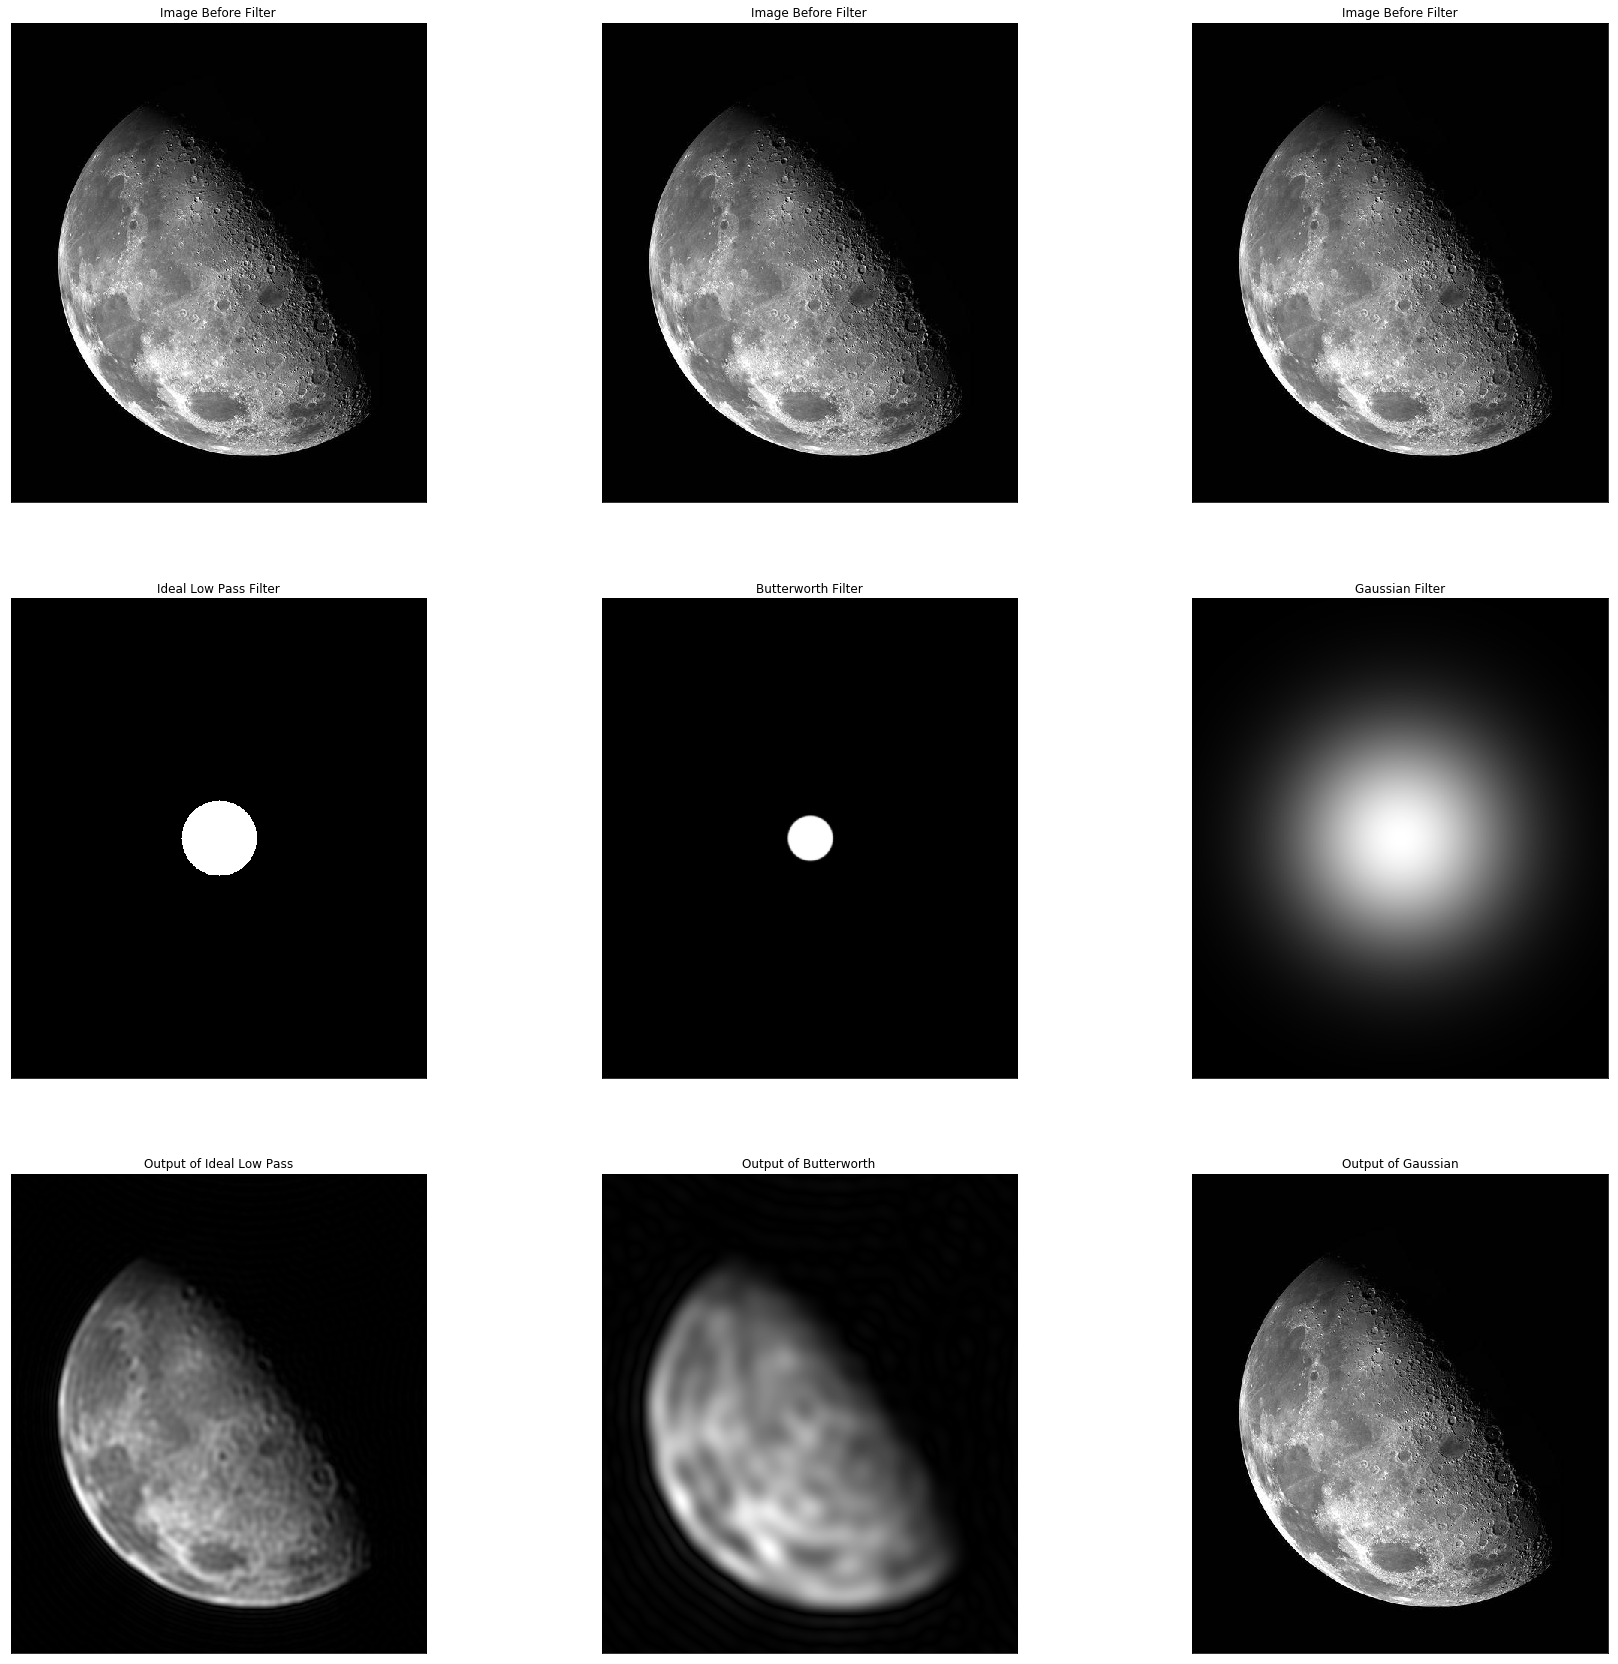

In [196]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from PIL import Image
img =cv2.imread('images/moon.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
col,row=img.shape
M,N=img.shape


def D(u,v):
    value=((u-M/2)**2)+((v-N/2)**2)
    return value**0.5

#Ideal LowPass Filter
#----------------------------------------
Dz=50
H=np.zeros((M,N,2),np.uint8)
H1=np.zeros((M,N))
for u in range(M):
    for v in range(N):
        if Dz>=D(u,v):H[u,v]=1;H1[u,v]=1
IdelFilter=H                  
fshift = dft_shift*IdelFilter
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
IdelFilter = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
#----------------------------------------


# Butterworth Filter
#----------------------------------------
Dz=30
n=30
H=np.zeros((M,N,2),np.uint8)
H2=np.zeros((M,N))
for u in range(M):
    for v in range(N):
        value=1/(1+(D(u,v)/Dz)**(2*n))
        H[u,v]=value
        H2[u,v]=value
butterworth=H                  
fshift2 = dft_shift*butterworth
f_ishift2 = np.fft.ifftshift(fshift2)
butterworth = cv2.idft(f_ishift2)
butterworth = cv2.magnitude(butterworth[:,:,0],butterworth[:,:,1])
#----------------------------------------


# Gaussian Filter
#----------------------------------------
Dz=0.01
H=np.zeros((M,N,2),np.uint8)
H3=np.zeros((M,N))
for u in range(M):
    for v in range(N):
        value=math.exp((-1*((D(u,v)**2))/2*(Dz**2)))
        H[u,v]=1-value
        H3[u,v]=1-value
H3=1-H3       
H =1-H
fshift3 = dft_shift*H
f_ishift3 = np.fft.ifftshift(fshift3)
gaussian = cv2.idft(f_ishift3)
gaussian = cv2.magnitude(gaussian[:,:,0],gaussian[:,:,1])

#----------------------------------------

filters = [img,img,img,H1,H2,H3,IdelFilter,butterworth,gaussian]
filter_name = ["Image Before Filter","Image Before Filter","Image Before Filter",
               'Ideal Low Pass Filter','Butterworth Filter',"Gaussian Filter",
               "Output of Ideal Low Pass","Output of Butterworth","Output of Gaussian"]


fig = plt.figure(figsize=(30,30))

for i in range(9):
    plt.subplot(3,3,i+1),plt.imshow(filters[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()